In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Import Library**

In [1]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install --ignore-installed Pillow==9.0.0

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached Pillow-9.0.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pytesseract
from pytesseract import Output
from PIL import Image

In [3]:
import io
import time

from datetime import timedelta

import logging
logging.basicConfig(level=logging.INFO)
import gensim

from gensim.models.wrappers import FastText
import re

INFO:summarizer.preprocessing.cleaner:'pattern' package not found; tag filters are not available for English


#**Read Image**

In [4]:
test = cv2.imread("/content/drive/MyDrive/Bangkit/sample_ktp.png")
test.shape

(798, 1226, 3)

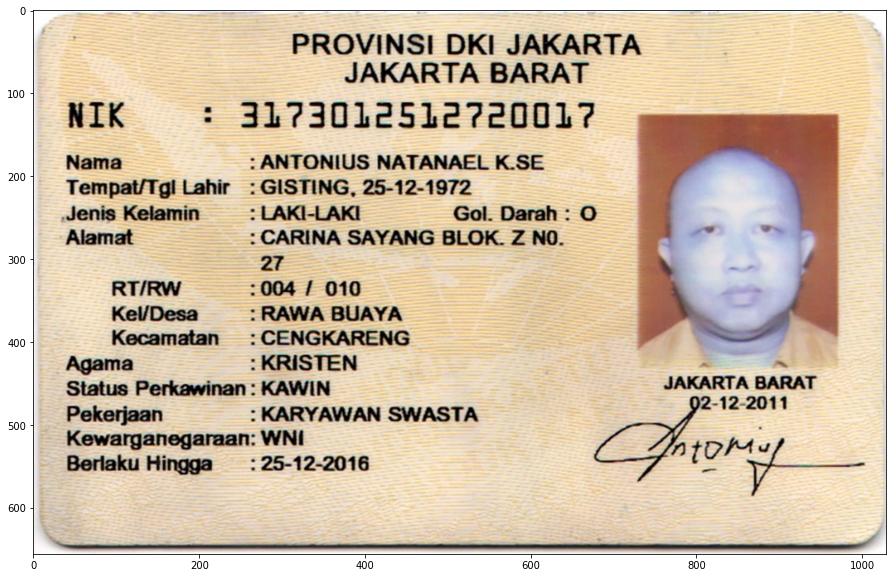

In [5]:
image = cv2.imread("/content/drive/MyDrive/Bangkit/26.jpg")
plt.figure(figsize = (40,10))
plt.imshow(image)

In [6]:
image.shape

(656, 1029, 3)

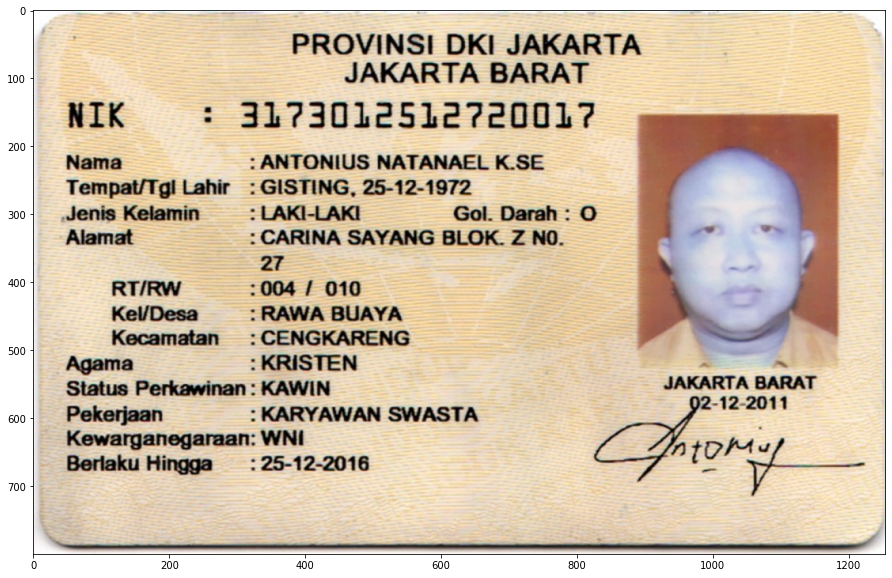

In [7]:
r = 800 / image.shape[0]
dim = (int(image.shape[1] * r), 800)

image = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
plt.figure(figsize = (40,10))
plt.imshow(image)

In [8]:
image.shape

(800, 1254, 3)

#**Pre-Processing Image**

1. Convert image to 1D

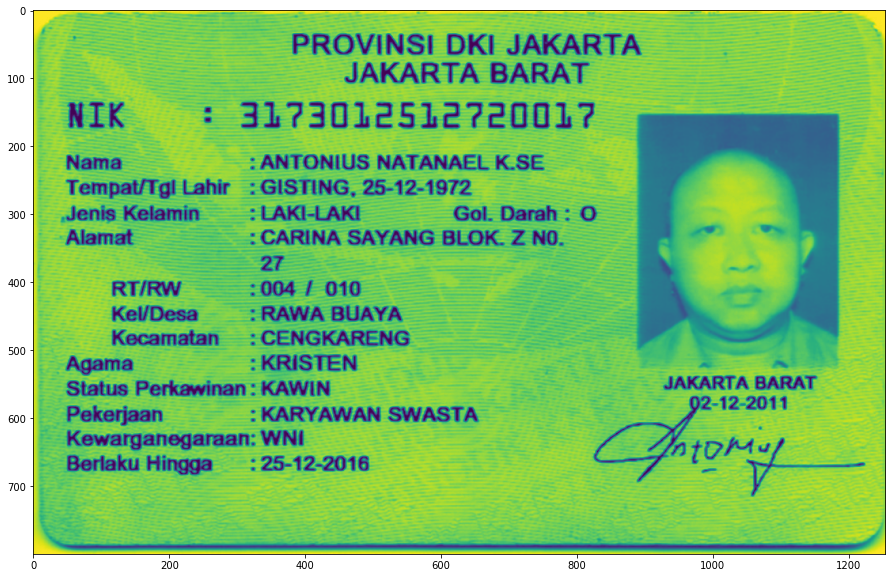

In [9]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize = (40,10))
plt.imshow(gray)

2. Convert into black and white

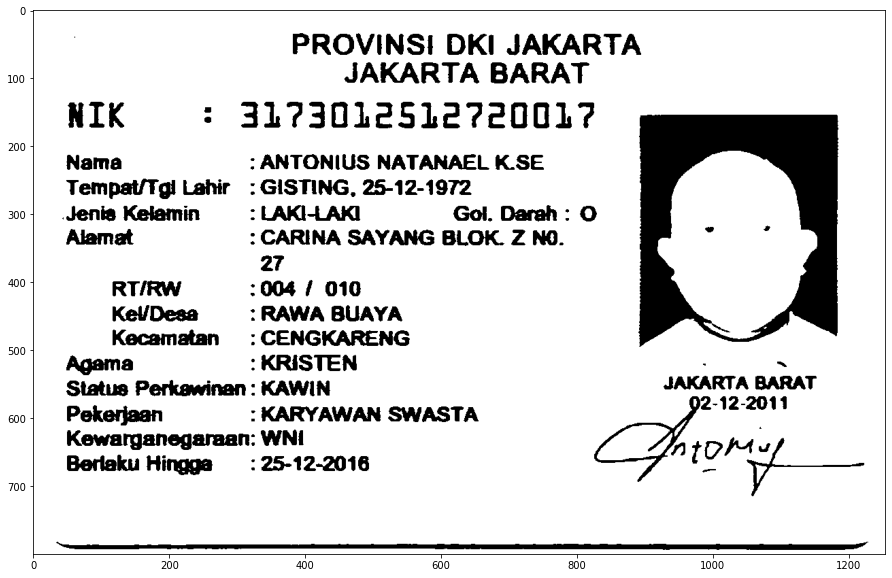

In [10]:
thresh = 127
blackWhite = cv2.threshold(gray,thresh,255,cv2.THRESH_BINARY)[1]
plt.figure(figsize = (40,10))
plt.imshow(blackWhite, cmap="gray")

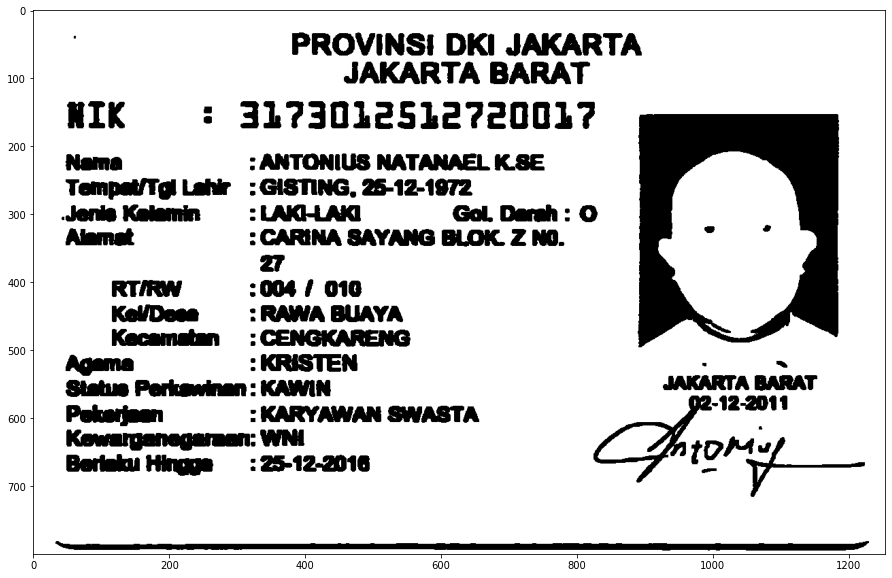

In [11]:
kernel = np.ones((3,3), np.uint8)

img_erosion = cv2.erode(blackWhite, kernel, iterations=1)
plt.figure(figsize = (30,10))
plt.imshow(img_erosion, cmap="gray")

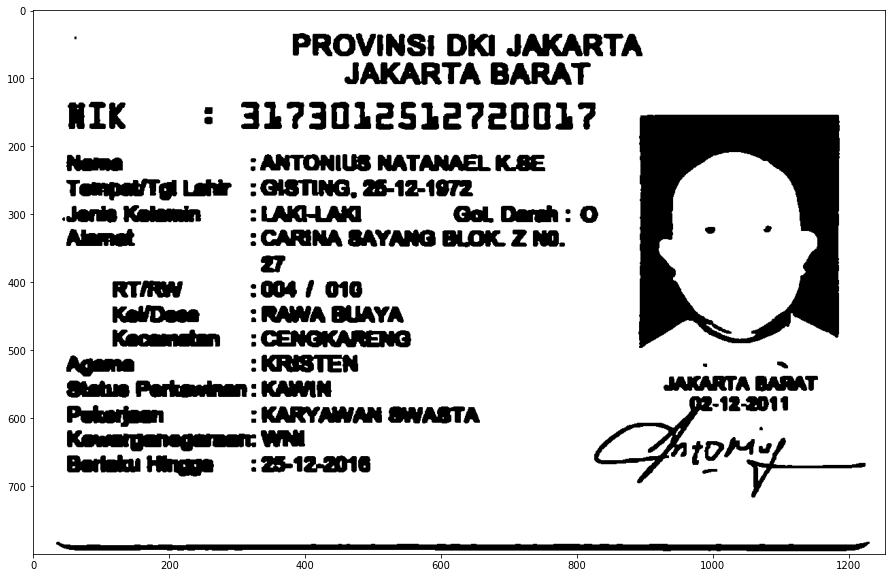

In [12]:
kernel = np.ones((2,2), np.uint8)

img_closing = cv2.morphologyEx(img_erosion, cv2.MORPH_OPEN, kernel, iterations=1)
plt.figure(figsize = (30,10))
plt.imshow(img_closing, cmap="gray")

# **Get text from image**

In [13]:
data = pytesseract.image_to_data(img_closing, output_type='data.frame')
data

level  page_num  block_num  par_num  line_num  word_num  left  top  width  \
0       1         1          0        0         0         0     0    0   1254   
1       2         1          1        0         0         0   382   34    514   
2       3         1          1        1         0         0   382   34    514   
3       4         1          1        1         1         0   382   34    514   
4       5         1          1        1         1         1   382   34    208   
..    ...       ...        ...      ...       ...       ...   ...  ...    ...   
63      5         1          3        4         1         4   439  434    106   
64      2         1          4        0         0         0    34  782   1196   
65      3         1          4        1         0         0    34  782   1196   
66      4         1          4        1         1         0    34  782   1196   
67      5         1          4        1         1         1    34  782   1196   

    height  conf      text  
0      800    -1       NaN  
1       76    -1       NaN  
2       76    -1       NaN  
3       35    -1       NaN  
4       34    41  PROVINS!  
..     ...   ...       ...  
63      26    92     BUAYA  
64      14    -1       NaN  
65      14    -1       NaN  
66      14    -1       NaN  
67      14    95            

[68 rows x 12 columns]

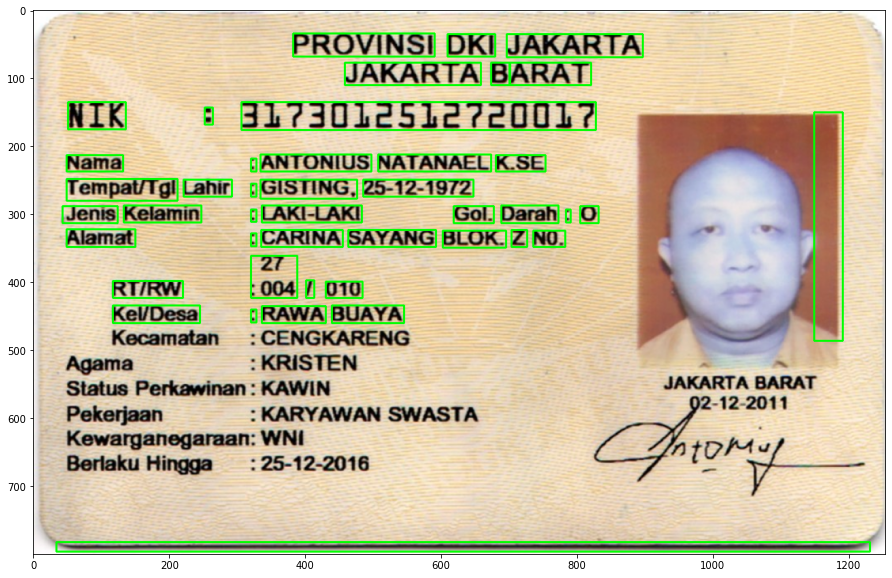

In [14]:
for box in range(len(data)):
  if data["conf"][box] >= 0:
    image = cv2.rectangle(image, (data['left'][box], data['top'][box]), 
                          (data['left'][box]+data['width'][box], data['top'][box]+data['height'][box]), 
                          (0,255,0),2)

plt.figure(figsize = (40,10))
plt.imshow(image)

In [15]:
result = pytesseract.image_to_string(img_erosion)
print(result)

PROVINS! DKI JAKARTA
JAKARTA BARAT

NIK > 3173012512720017

Nama : ANTONIUS NATANAEL I.SE

Tempet/Tgi Lahir : GISTING, 25-12-1972

Jerie Kelemin =: LAKI-LAKI Gol. Darah : O

Alamat : CARINA SAYANG BLOK. Z NO.
RTRW 008! 010

 

Kel/Desea : RAWA BUAYA
Kecamatan :CENGKARENG

Agama : KRISTEN . ~
Statue Perkewinan : KAWIN JAKARTA BARAT

Pekerjeen : KARYAWAN SWASTA t2-2011
Kewargenegaraan: WNi toMy
Berlaku Hingga =: 25-12-2016 - ~—

 



In [16]:
list_value = result.split("\n")
list_value

['PROVINS! DKI JAKARTA',
 'JAKARTA BARAT',
 '',
 'NIK > 3173012512720017',
 '',
 'Nama : ANTONIUS NATANAEL I.SE',
 '',
 'Tempet/Tgi Lahir : GISTING, 25-12-1972',
 '',
 'Jerie Kelemin =: LAKI-LAKI Gol. Darah : O',
 '',
 'Alamat : CARINA SAYANG BLOK. Z NO.',
 'RTRW 008! 010',
 '',
 ' ',
 '',
 'Kel/Desea : RAWA BUAYA',
 'Kecamatan :CENGKARENG',
 '',
 'Agama : KRISTEN . ~',
 'Statue Perkewinan : KAWIN JAKARTA BARAT',
 '',
 'Pekerjeen : KARYAWAN SWASTA t2-2011',
 'Kewargenegaraan: WNi toMy',
 'Berlaku Hingga =: 25-12-2016 - ~—',
 '',
 ' ',
 '\x0c']

# **Koreksi Typo**

In [17]:
import re
from collections import Counter

def words(text): return re.findall(r'\w+', text.lower())

WORDS = Counter(words(open('/content/drive/MyDrive/Bangkit/katadasar.txt').read()))

def P(word, N=sum(WORDS.values())):
    # "Probability of `word`."
    return WORDS[word] / N

def correction(word):
    # "Most probable spelling correction for word."
    return max(candidates(word), key=P)

def candidates(word):
    # "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words):
    # "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)

def edits1(word):
    # "All edits that are one edit away from `word`."
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)] # [('', 'kemarin'), ('k', 'emarin'), ('ke', 'marin'), dst]
    deletes    = [L + R[1:]               for L, R in splits if R] # ['emarin', 'kmarin', 'kearin', dst]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1] # ['ekmarin', 'kmearin', 'keamrin', dst]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters] # ['aemarin', 'bemarin', 'cemarin', dst]
    inserts    = [L + c + R               for L, R in splits for c in letters] # ['akemarin', 'bkemarin', 'ckemarin', dst]
    return set(deletes + transposes + replaces + inserts)

def edits2(word):
    # "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

In [18]:
new_list = []
for string in list_value:
  if string.isspace() or len(string)==0:
    continue
  lower_string = string.lower()
  no_punc_string = re.sub(r'[^\w\s]','', lower_string)
  no_wspace_string = no_punc_string.replace('\n', ' ')
  no_punc_string = re.sub(r'[^\w\s]','', lower_string)
  no_wspace_string = no_punc_string.replace('\n', ' ')
  no_wspace_string = re.sub(' +', ' ', no_wspace_string)
  new_list.append(correction(no_wspace_string))

new_list

['provins dki jakarta',
 'jakarta barat',
 'nik 3173012512720017',
 'nama antonius natanael ise',
 'tempettgi lahir gisting 25121972',
 'jerie kelemin lakilaki gol darah o',
 'alamat carina sayang blok z no',
 'rtrw 008 010',
 'keldesea rawa buaya',
 'kecamatan cengkareng',
 'agama kristen ',
 'statue perkewinan kawin jakarta barat',
 'pekerjeen karyawan swasta t22011',
 'kewargenegaraan wni tomy',
 'berlaku hingga 25122016 ']

In [19]:
new_value = []
for string in new_list:
  temp = ''
  data = string.split(" ")
  for s in data:
    # print(correction(s))
    temp = temp + " " + correction(s)
  new_value.append(temp[1:])

In [20]:
new_value

['provinsi dki jakarta',
 'jakarta barat',
 'nik 3173012512720017',
 'nama antonius natanael is',
 'tempattgl lahir gisting 25121972',
 'jenis kelamin lakilaki gol darah o',
 'alamat carina sayang blok z o',
 'rtrw 008 010',
 'keldesa rawa buaya',
 'kecamatan cengkareng',
 'agama kristen o',
 'status perkawinan kawin jakarta barat',
 'pekerjaan karyawan swasta t22011',
 'kewarganegaraan wni tomy',
 'berlaku hingga 25122016 o']

In [27]:
kabupaten = new_value[1]
kabupaten

'jakarta barat'

In [21]:
list_string = no_wspace_string.split()
new_list = []
for word in list_string:
  new_list.append(correction(word))

# **Get value**

In [22]:
def txt_to_list(path):
  # opening the file in read mode
  my_file = open(path, "r")
    
  # reading the file
  data = my_file.read()
    
  # replacing end splitting the text 
  # when newline ('\n') is seen.
  data_into_list = data.split("\n")
  my_file.close()
  return data_into_list

In [23]:
prevalue = txt_to_list('/content/drive/MyDrive/Bangkit/key.txt')
pair = {}
for string in new_value:
  temp = string.split(' ')
  new_temp = []
  flag = False
  keyFlag = False
  key = ''
  for word in temp:
    if flag == False and word in prevalue:
      flag = True
      keyFlag = True
      key = word
    if flag and keyFlag:
      pair[key] = ''
      keyFlag = False
    if flag and not keyFlag:
      pair[key] = pair[key] + " " + word

In [24]:
new_pair = {}
for string in pair.keys():
  # print(pair[string])
  temp = pair[string].split(' ')
  temp = temp[2:]
  new_pair[string] = ' '.join(temp)

In [28]:
new_pair['kabupaten'] = kabupaten
new_pair

{'agama': 'kristen o',
 'alamat': 'carina sayang blok z o',
 'hingga': '25122016 o',
 'kabupaten': 'jakarta barat',
 'kecamatan': 'cengkareng',
 'kelamin': 'lakilaki gol darah o',
 'keldesa': 'rawa buaya',
 'kewarganegaraan': 'wni tomy',
 'nama': 'antonius natanael is',
 'nik': '3173012512720017',
 'pekerjaan': 'karyawan swasta t22011',
 'perkawinan': 'kawin jakarta barat',
 'provinsi': 'dki jakarta',
 'rtrw': '008 010',
 'tempattgl': 'lahir gisting 25121972'}

In [46]:
darah = new_pair['kelamin'].split(' ')
darah

new_pair['kelamin'] = darah[0]
new_pair['darah'] = darah[-1]

# **Convert to JSON**

In [47]:
list_key = new_pair.keys()
list_key

dict_keys(['provinsi', 'nik', 'nama', 'tempattgl', 'kelamin', 'alamat', 'rtrw', 'keldesa', 'kecamatan', 'agama', 'perkawinan', 'pekerjaan', 'kewarganegaraan', 'hingga', 'kabupaten', 'darah'])

In [48]:
new_dict = {}

if 'provinsi' in list_key:
  new_dict['province'] = new_pair['provinsi']

if 'kabupaten' in list_key:
  new_dict['district'] = new_pair['kabupaten']

if 'nik' in list_key:
  new_dict['id_number'] = new_pair['nik']

if 'nama' in list_key:
  new_dict['name'] = new_pair['nama']

if 'tempattgl' in list_key:
  new_dict['place_date_of_birth'] = new_pair['tempattgl']

if 'kelamin' in list_key:
  new_dict['gender'] = new_pair['kelamin']

if 'darah' in list_key:
  new_dict['blood_type'] = new_pair['darah']

if 'keldesa' in list_key:
  new_dict['address'] = new_pair['keldesa']

if 'rtrw' in list_key:
  new_dict['neighborhood'] = new_pair['rtrw']

if 'keldesa' in list_key:
  new_dict['village'] = new_pair['keldesa']

if 'kecamatan' in list_key:
  new_dict['subdistrict'] = new_pair['kecamatan']

if 'agama' in list_key:
  new_dict['religion'] = new_pair['agama']

if 'perkawinan' in list_key:
  new_dict['marital_status'] = new_pair['perkawinan']

if 'pekerjaan' in list_key:
  new_dict['occupation'] = new_pair['pekerjaan']

if 'kewarganegaraan' in list_key:
  new_dict['nationality'] = new_pair['kewarganegaraan']

if 'hingga' in list_key:
  new_dict['expiry_date'] = new_pair['hingga']

In [49]:
new_dict 

{'address': 'rawa buaya',
 'blood_type': 'o',
 'district': 'jakarta barat',
 'expiry_date': '25122016 o',
 'gender': 'lakilaki',
 'id_number': '3173012512720017',
 'marital_status': 'kawin jakarta barat',
 'name': 'antonius natanael is',
 'nationality': 'wni tomy',
 'neighborhood': '008 010',
 'occupation': 'karyawan swasta t22011',
 'place_date_of_birth': 'lahir gisting 25121972',
 'province': 'dki jakarta',
 'religion': 'kristen o',
 'subdistrict': 'cengkareng',
 'village': 'rawa buaya'}

In [50]:
res = {}

for key in new_dict.keys():
  res[key] = new_dict[key].upper()

res

{'address': 'RAWA BUAYA',
 'blood_type': 'O',
 'district': 'JAKARTA BARAT',
 'expiry_date': '25122016 O',
 'gender': 'LAKILAKI',
 'id_number': '3173012512720017',
 'marital_status': 'KAWIN JAKARTA BARAT',
 'name': 'ANTONIUS NATANAEL IS',
 'nationality': 'WNI TOMY',
 'neighborhood': '008 010',
 'occupation': 'KARYAWAN SWASTA T22011',
 'place_date_of_birth': 'LAHIR GISTING 25121972',
 'province': 'DKI JAKARTA',
 'religion': 'KRISTEN O',
 'subdistrict': 'CENGKARENG',
 'village': 'RAWA BUAYA'}

In [53]:
import json 

json_object = json.dumps(res, indent = 4)

In [54]:
print(json_object)

{
    "province": "DKI JAKARTA",
    "district": "JAKARTA BARAT",
    "id_number": "3173012512720017",
    "name": "ANTONIUS NATANAEL IS",
    "place_date_of_birth": "LAHIR GISTING 25121972",
    "gender": "LAKILAKI",
    "blood_type": "O",
    "address": "RAWA BUAYA",
    "neighborhood": "008 010",
    "village": "RAWA BUAYA",
    "subdistrict": "CENGKARENG",
    "religion": "KRISTEN O",
    "marital_status": "KAWIN JAKARTA BARAT",
    "occupation": "KARYAWAN SWASTA T22011",
    "nationality": "WNI TOMY",
    "expiry_date": "25122016 O"
}


In [241]:
# def get_pair(data, prevalue, postvalue):
#   pair = {}
#   flag = False
#   key = ''
#   for word in data:
#     temp = ''
#     keyFlag = False
#     # print("true "+word)
#     if flag == True and (word in prevalue) or (word in postvalue):
#       flag = False
#     if flag==False and len(word)>1 and (word in prevalue):
#       flag = True
#       keyFlag = True
#     if keyFlag == True:
#       key = word
#       print(key)
#       pair[key] = ''
#       keyFlag = False
#       continue
#     if flag == True and keyFlag == False:
#       # temp = temp + ' ' + word
#       print("value : " + word)
#       temp = pair[key]
#       temp = temp + " " + word
#       pair[key] = temp
#     if (word in postvalue) or (word in prevalue):
#       flag = False
#     # if keyFlag == False and flag == False:
#     #   print(key)
#     #   print(temp)
#   return pair

In [230]:
# prevalue = txt_to_list('/content/drive/MyDrive/Bangkit/key.txt')
# postvalue = txt_to_list('/content/drive/MyDrive/Bangkit/last.txt')

In [52]:
# from difflib import SequenceMatcher

# def similar(a, b):
#     return SequenceMatcher(None, a, b).ratio()

# similar('hinge','hingga')

0.7272727272727273